In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


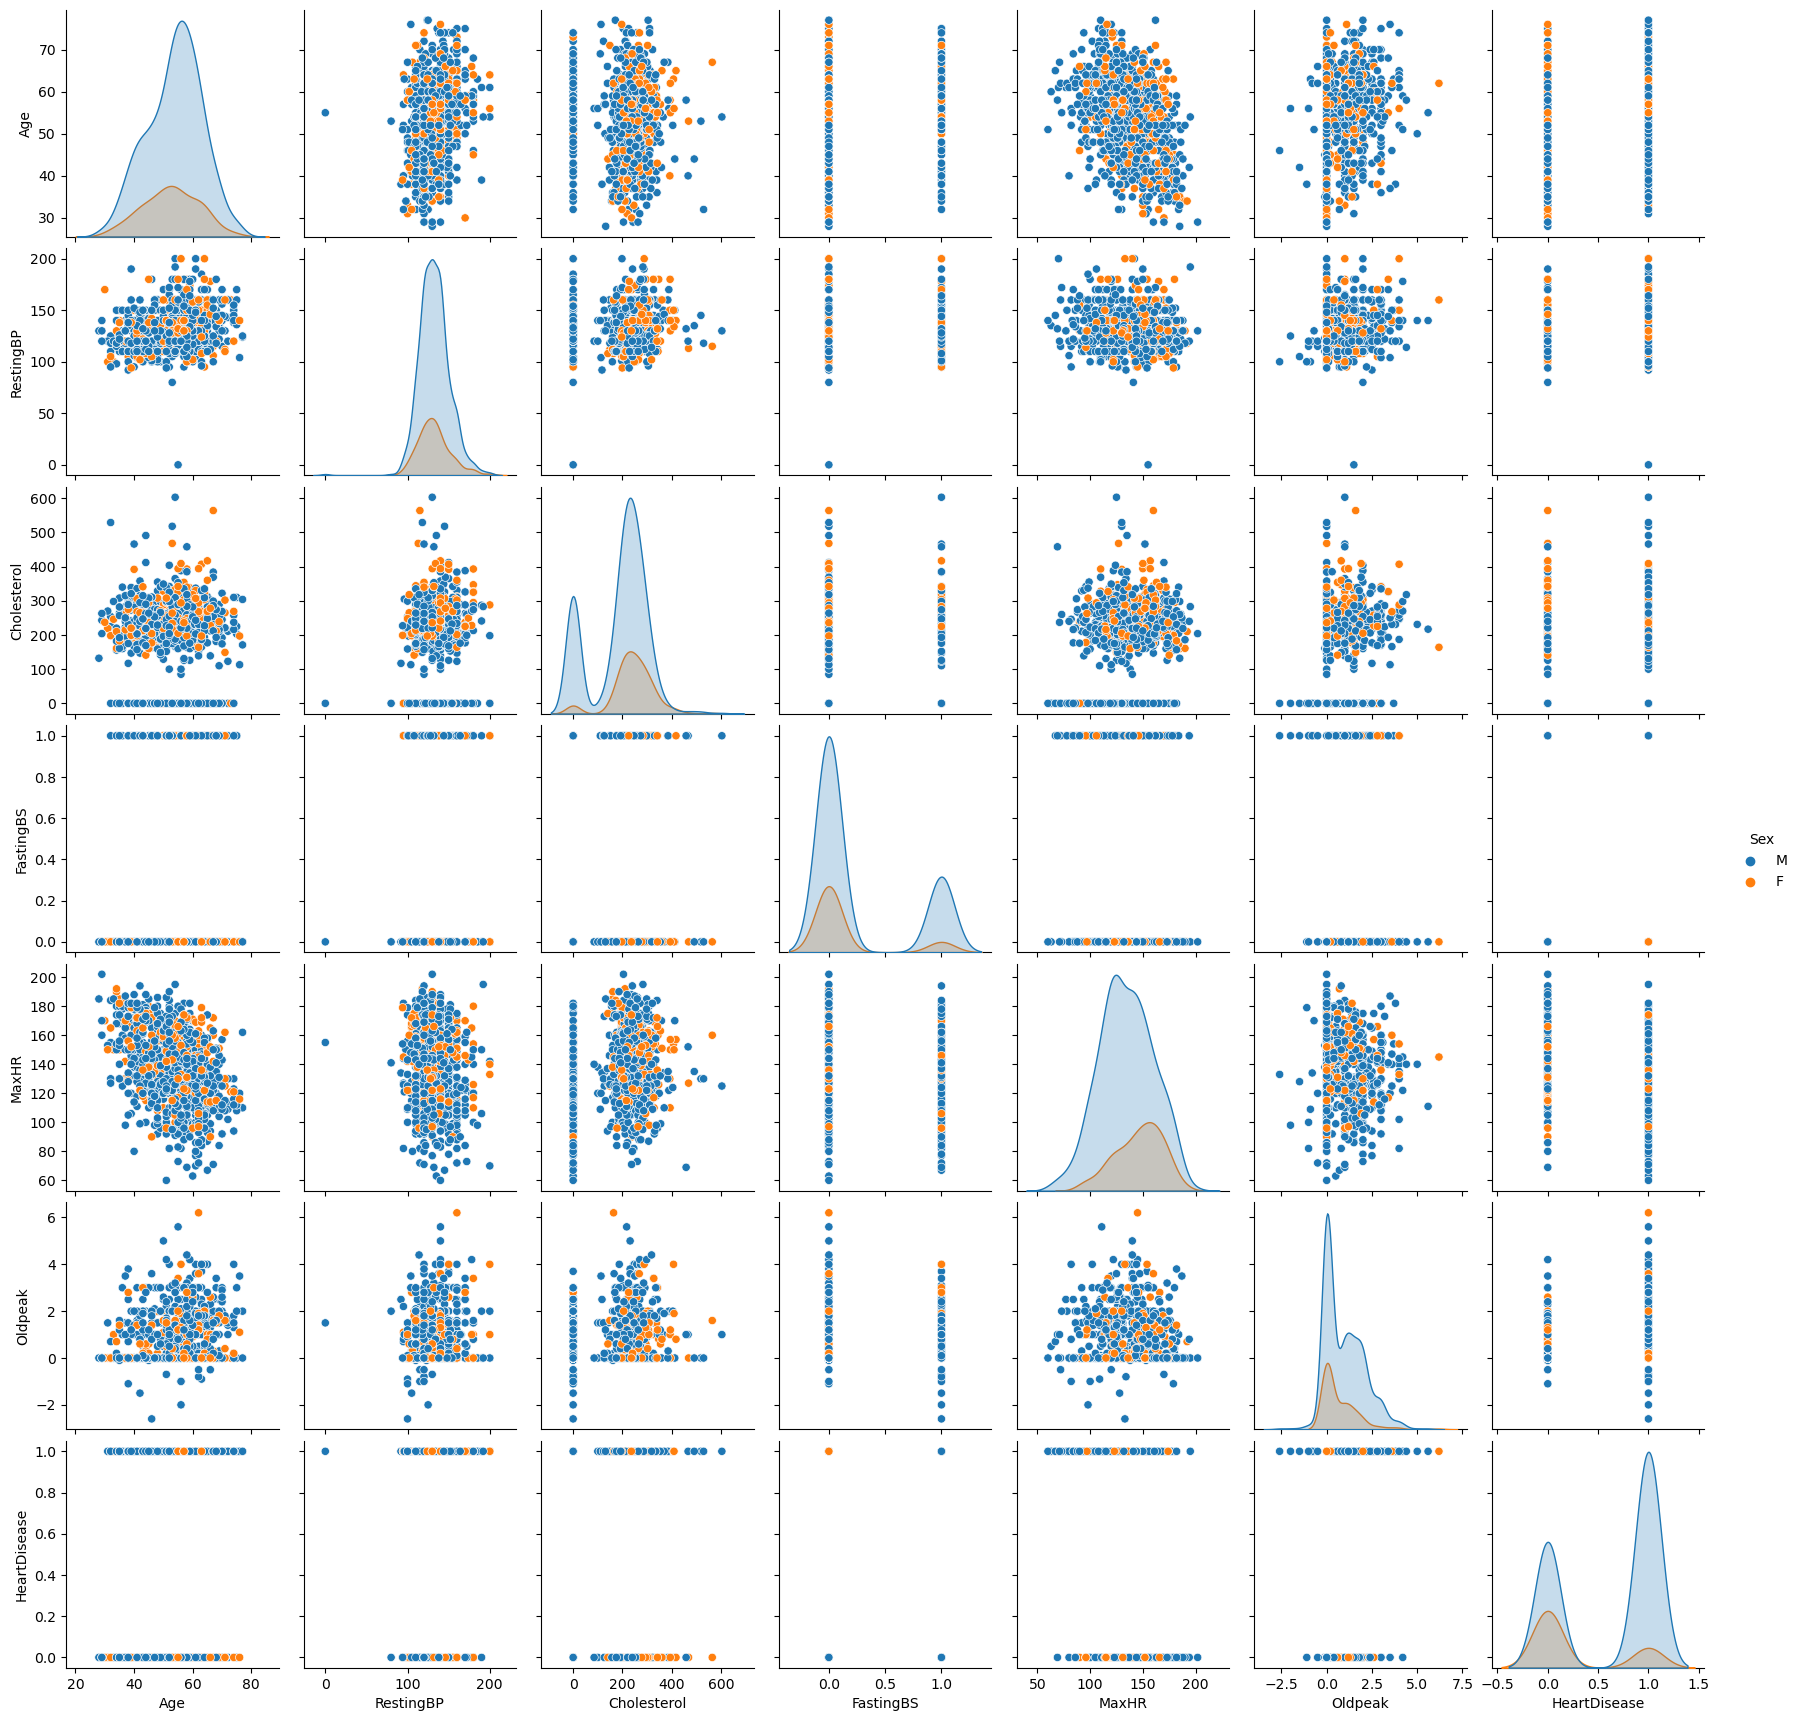

In [8]:
sns.pairplot(data=df, hue='Sex')

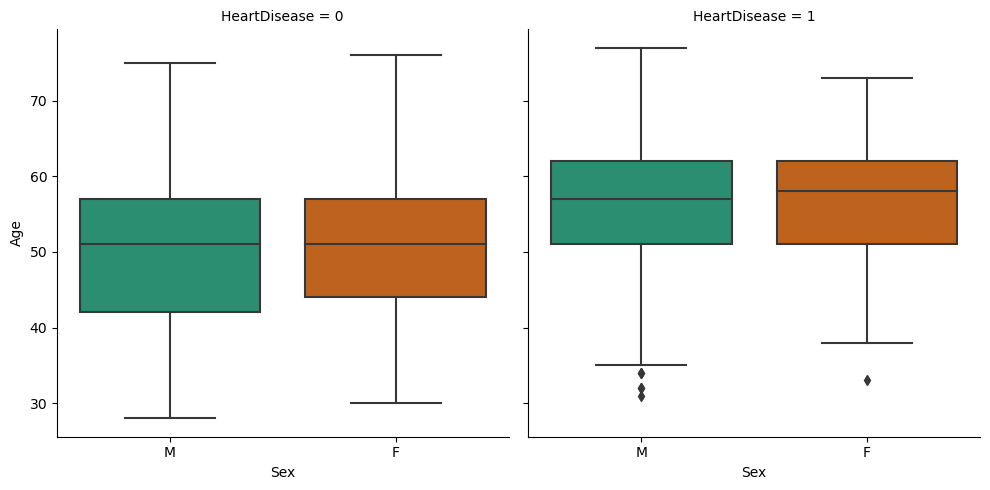

In [9]:
sns.catplot(data=df, x='Sex',y='Age',kind='box',col='HeartDisease',palette='Dark2')

<Axes: xlabel='Sex', ylabel='count'>

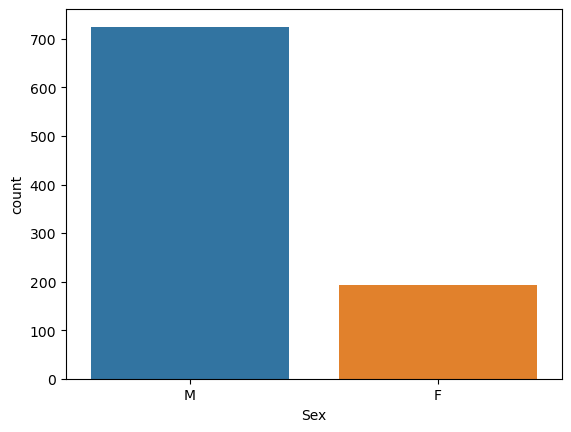

In [11]:
df['Sex'].value_counts()
sns.countplot(data=df, x='Sex')

In [12]:
df["Sex"].unique()

array(['M', 'F'], dtype=object)

In [13]:
X=pd.get_dummies(df.drop("Sex", axis=1))
y=df["Sex"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split (X, y, test_size=0.3, random_state=101)
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier (n_estimators=10, max_features="auto", random_state=101)
model.fit(X_train, y_train)

C:\Users\suhaas rao s\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=10, random_state=101)

In [15]:
y_pred=model.predict (X_test)
from sklearn.metrics import confusion_matrix, classification_report 
confusion_matrix(y_pred, y_test)

array([[ 16,  18],
       [ 41, 201]], dtype=int64)

In [16]:
print (classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           F       0.28      0.47      0.35        34
           M       0.92      0.83      0.87       242

    accuracy                           0.79       276
   macro avg       0.60      0.65      0.61       276
weighted avg       0.84      0.79      0.81       276



In [17]:
model.feature_importances_

array([0.14463991, 0.16343135, 0.19635882, 0.02452074, 0.14245991,
       0.08141861, 0.06887557, 0.02494576, 0.01574737, 0.01273138,
       0.00533602, 0.01608179, 0.01653286, 0.01519081, 0.02172276,
       0.01338178, 0.0065622 , 0.01726415, 0.0127982 ])

In [18]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Age,0.144640
RestingBP,0.163431
Cholesterol,0.196359
FastingBS,0.024521
MaxHR,0.142460
Oldpeak,0.081419
HeartDisease,0.068876
ChestPainType_ASY,0.024946
ChestPainType_ATA,0.015747
ChestPainType_NAP,0.012731
